# **Import Libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset from url**

In [10]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed = pd.read_csv(url_confirmed)
df_deaths = pd.read_csv(url_deaths)
df_recovered = pd.read_csv(url_recovered)

# **Display few rows of each DataFrame**

In [11]:
print(df_confirmed.head())
print(df_deaths.head())
print(df_recovered.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

# **Cleaning and Preprocessing Data**

In [12]:
df_confirmed_long = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                      var_name='Date', value_name='Confirmed')
df_deaths_long = df_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                var_name='Date', value_name='Deaths')
df_recovered_long = df_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                      var_name='Date', value_name='Recovered')

df_merged = df_confirmed_long.merge(df_deaths_long, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
df_merged = df_merged.merge(df_recovered_long, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

df_merged['Date'] = pd.to_datetime(df_merged['Date'])
print(df_merged.head())

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  


<ipython-input-12-3f44a4d17312>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['Date'] = pd.to_datetime(df_merged['Date'])


# **Exploratory Data Analysis**

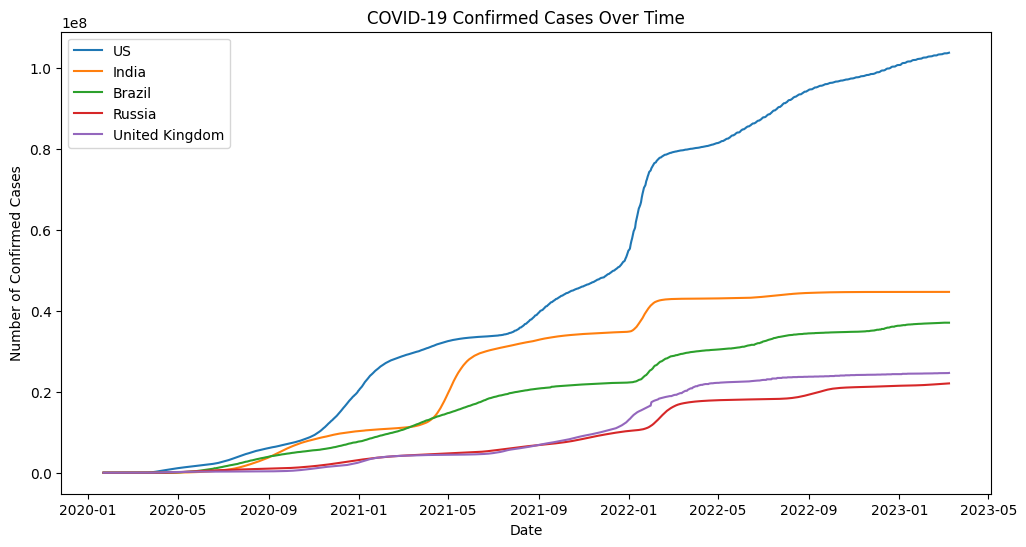

In [13]:
df_country_date = df_merged.groupby(['Country/Region', 'Date']).sum().reset_index()

countries = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom']
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_country_date[df_country_date['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.legend()
plt.show()


# **Modeling the spread**

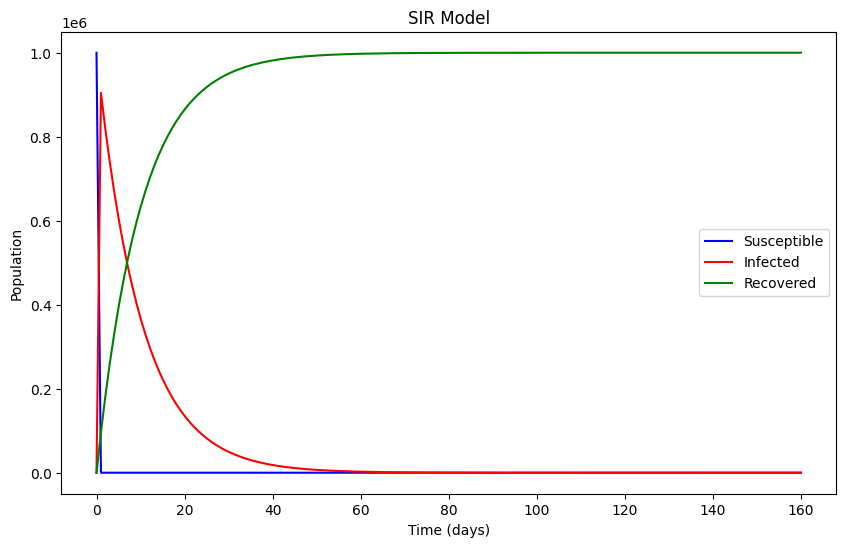

In [14]:
from scipy.integrate import odeint

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

N = 1000000         # Population
I0 = 1              # Initial number of infected individuals
R0 = 0              # Initial number of recovered individuals
S0 = N - I0 - R0    # Initial number of susceptible individuals
beta = 0.3          # Infection rate
gamma = 0.1         # Recovery rate

t = np.linspace(0, 160, 160)    # Time points (in days)

y0 = [S0, I0, R0]     # Initial conditions vector

ret = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = ret.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.show()
